In [26]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# データをダウンロード
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


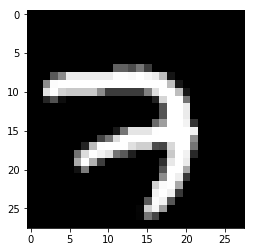

In [28]:
# データの中身を表示
image = mnist.train.images[0]
label = mnist.train.labels[0]

print(label)

image = image.reshape(28, 28)
plt.imshow(image, cmap="gray")
plt.show()

In [29]:
# 入力画像
x = tf.placeholder(tf.float32,[None,784])

# 正解ラベル
y_ = tf.placeholder(tf.float32, [None,10])

# モデルを定義
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 目的関数
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# 最適化方法
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [30]:
# 学習
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    images, labels = mnist.train.next_batch(100)
    feed_dict = {x: images, y_: labels}
    sess.run(train_step, feed_dict=feed_dict)

In [31]:
# 予測
images = mnist.test.images
labels = mnist.test.labels

feed_dict = {x: images}
pred  = sess.run( y, feed_dict=feed_dict)

# 評価
N = len(images)
correct_pred = 0

for i in range(N):
    label_idx = np.argmax( labels[i] )
    pred_idx = np.argmax( pred[i] )
    if label_idx==pred_idx:
        correct_pred += 1.0
        
print( correct_pred / N )

0.9167
